In [1]:
import os
#path = os.path.abspath(os.path.join('..','..'))
#print(path)
#import sys

#sys.path.insert(0,path)
#print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, CashFlowInput, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':[800,1000],
        'b':0,
        'fluid_rate':1200
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'M',
    'freq_output':'M',
    'rate_limit': 400
}

p2_dict = {
    'name':'pud',
    'dca': {
        'ti':['2022-01-01','2022-05-01'],
        'di':0.3,
        'freq_di':'A',
        'qi':1500,
        'b':0,
        'fluid_rate':1600
    },
    'start':'2022-01-01',
    'end':'2027-01-01',
    'freq_input':'M',
    'freq_output':'M',
    'depends':{'period':'pdp'}
}

p1 = Period(**p1_dict)
p2 = Period(**p2_dict)



In [3]:
d1 = dca.Arps(**{
        'ti':['2022-01-01','2022-05-01'],
        'di':[0.3,0.4],
        'freq_di':'A',
        'qi':1500,
        'b':0,
        'fluid_rate':1600
    })
d1.forecast(start=date(2022,1,1), end=date(2025,1,1)).head()

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume
date,,,,,,,,,,,,
2022-01,1500.000000,0.000000,0,0.000000,1600.0,100.000000,0.062500,0.066667,0.000000,0.0,0.000000,0.0
2022-02,1462.263615,45912.602173,0,45912.602173,1600.0,137.736385,0.086085,0.094194,4269.827946,49600.0,4269.827946,49600.0
2022-03,1428.995797,86388.447509,0,40475.845337,1600.0,171.004203,0.106878,0.119667,9057.945642,94400.0,4788.117696,44800.0
2022-04,1393.045706,130127.724519,0,43739.277010,1600.0,206.954294,0.129346,0.148562,15473.528760,144000.0,6415.583118,49600.0
2022-05,1359.116656,171408.068452,0,41280.343934,1600.0,240.883344,0.150552,0.177235,22700.029078,192000.0,7226.500318,48000.0


In [4]:
qi = [400,500]
di = 0.3
b = 0
ti = [date(2021,2,1), date(2021,4,1)]
di_f = 'A'
fluid_rate = [1000,1200,1300,1200,1300,1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
           oil_rate       oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                     
2021-02  400.000000      0.000000          0      0.000000      1000.0   
2021-03  390.899639  11072.106269          0  11072.106269      1200.0   
2021-04  381.065546  23036.919336          0  11964.813067      1300.0   
2021-05  371.784305  34329.094979          0  11292.175643      1200.0   
2021-06  362.431108  45708.818254          0  11379.723275      1300.0   
2021-07  353.603729  56448.796662         

In [5]:
s1 = Scenario(name='base', periods=[p1,p2])
s1

Scenario(name='base', periods=[Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: [800.0, 1000.0] bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=400.0, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None), Period(name='pud', dca=Declination 
 Ti: [datetime.date(2022, 1, 1), datetime.date(2022, 5, 1)] 
 Qi: 1500.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2022, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=Depends(period='pdp', delay=None), forecast=None)], cashflow_params=None, cashflow=None, forecast=None)

In [6]:
fore1 = s1.generate_forecast()

/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:274: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
[datetime.date(2023, 4, 1), datetime.date(2024, 1, 1)]
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:78: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:101: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/dcapy/dcapy/dca/arps.py:102: RuntimeWarn

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

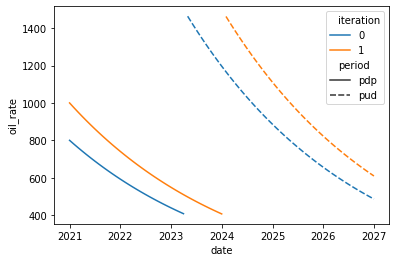

In [7]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration', style='period')

In [8]:
fore1

,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period,scenario
date,,,,,,,,,,,,,,
2021-01,800.000000,0.000000e+00,0,0.000000,1200.0,400.000000,0.333333,0.500000,0.000000,0.0,0.000000,0.0,pdp,base
2021-02,779.873928,2.448672e+04,0,24486.721159,1200.0,420.126072,0.350105,0.538710,13023.908238,37200.0,13023.908238,37200.0,pdp,base
2021-03,762.131092,4.607384e+04,0,21587.117513,1200.0,437.868908,0.364891,0.574532,25284.237676,70800.0,12260.329438,33600.0,pdp,base
2021-04,742.957710,6.940145e+04,0,23327.614405,1200.0,457.042290,0.380869,0.615166,39452.548672,108000.0,14168.310996,37200.0,pdp,base
2021-05,724.862217,9.141764e+04,0,22016.183431,1200.0,475.137783,0.395948,0.655487,53706.682175,144000.0,14254.133503,36000.0,pdp,base
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-09,673.624236,1.005424e+06,1,21150.660691,1600.0,926.375764,0.578985,1.375211,568607.208089,2726400.0,28717.648688,49600.0,pud,base
2026-10,657.217430,1.025385e+06,1,19961.613622,1600.0,942.782570,0.589239,1.434506,596890.685185,2774400.0,28283.477096,48000.0,pud,base
2026-11,640.683423,1.045502e+06,1,20116.374941,1600.0,959.316577,0.599573,1.497333,626629.499061,2824000.0,29738.813876,49600.0,pud,base
